In [ ]:
from qiskit import *
from qiskit import Aer
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram
statevector_backend = Aer.get_backend('statevector_simulator')

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[5];
creg c0[5];
x q0[4];
barrier q0[0],q0[1],q0[2],q0[3],q0[4];
h q0[0];
h q0[1];
h q0[2];
h q0[3];
h q0[4];
barrier q0[0],q0[1],q0[2],q0[3],q0[4];
cx q0[0],q0[4];
cx q0[1],q0[4];
barrier q0[0],q0[1],q0[2],q0[3],q0[4];
h q0[0];
h q0[1];
h q0[2];
h q0[3];
h q0[4];
barrier q0[0],q0[1],q0[2],q0[3],q0[4];
measure q0[0] -> c0[0];
measure q0[1] -> c0[1];
measure q0[2] -> c0[2];
measure q0[3] -> c0[3];
measure q0[4] -> c0[4];



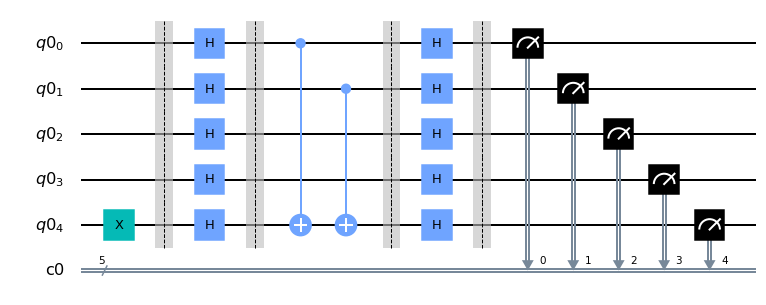

In [2]:

key = 3 #0011

q = QuantumRegister(5)
c = ClassicalRegister(5)

num_qubits = 5
init = QuantumCircuit (q,c)
superposition = QuantumCircuit (q,c)
oracle = QuantumCircuit (q, c)
measure = QuantumCircuit (q,c)

init.x(q[4])
init.barrier()
superposition.h(q)
superposition.barrier()
    
for i in range(num_qubits):
    if (key & (1<<i)):
        oracle.cx(q[i],q[4]) 
        
oracle.barrier()

measure.measure(q,c)

circuit = init+superposition+oracle+superposition+measure
print (circuit.qasm())
circuit.draw()

{'10011': 1000}


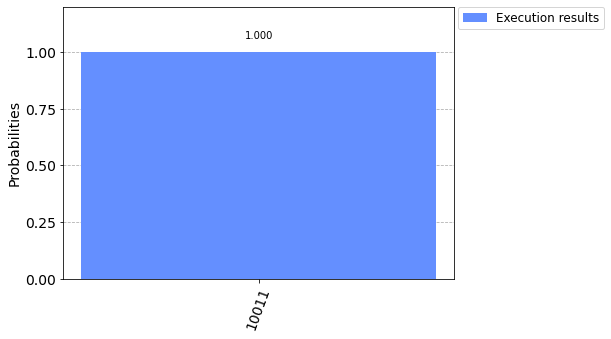

In [3]:
backend = Aer.get_backend('qasm_simulator')

job = execute(circuit,backend,shots=1000)

counts = job.result().get_counts()
print(counts)

from qiskit.tools.visualization import plot_histogram

legend = ['Execution results']
plot_histogram(counts,legend=legend)

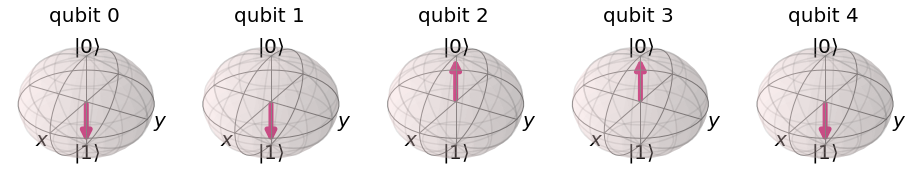

In [4]:
final_state = execute(circuit,statevector_backend).result().get_statevector()

plot_bloch_multivector(final_state)